In [4]:
import pandas as pd
import numpy as np
import datetime
import math 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [5]:
marsData = pd.read_csv('/home/abhishek/Documents/data analytics/01_data_mars_opposition_updated.csv')

In [102]:
marsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Year                   12 non-null     int64
 1   Month                  12 non-null     int64
 2   Day                    12 non-null     int64
 3   Hour                   12 non-null     int64
 4   Minute                 12 non-null     int64
 5   ZodiacIndex            12 non-null     int64
 6   Degree                 12 non-null     int64
 7   Minute.1               12 non-null     int64
 8   Second                 12 non-null     int64
 9   LatDegree              12 non-null     int64
 10  LatMinute              12 non-null     int64
 11  ZodiacIndexAverageSun  12 non-null     int64
 12  DegreeMean             12 non-null     int64
 13  MinuteMean             12 non-null     int64
 14  SecondMean             12 non-null     int64
dtypes: int64(15)
memory usage: 1.5 KB


In [89]:
marsData

,Year,Month,Day,Hour,Minute,ZodiacIndex,Degree,Minute.1,Second,LatDegree,LatMinute,ZodiacIndexAverageSun,DegreeMean,MinuteMean,SecondMean
0,1580,11,18,1,31,2,6,28,35,1,40,1,25,49,31
1,1582,12,28,3,58,3,16,55,30,4,6,3,9,24,55
2,1585,1,30,19,14,4,21,36,10,4,32,4,20,8,9
3,1587,3,6,7,23,5,25,43,0,3,41,6,0,47,40
4,1589,4,14,6,23,7,4,23,0,1,12,7,14,18,26
5,1591,6,8,7,43,8,26,43,0,-4,0,9,5,43,55
6,1593,8,25,17,27,11,12,16,0,-6,-2,11,9,55,4
7,1595,10,31,0,39,1,17,31,40,0,8,1,7,13,9
8,1597,12,13,15,44,3,2,28,0,3,33,2,23,11,56
9,1600,1,18,14,2,4,8,38,0,4,30,4,4,35,50


In [8]:
marsHeliocentric_longitude = marsData.values[:, 5:9]
   # print( marsHeliocenric data)
print(marsHeliocentric_longitude)

[[ 2  6 28 35]
 [ 3 16 55 30]
 [ 4 21 36 10]
 [ 5 25 43  0]
 [ 7  4 23  0]
 [ 8 26 43  0]
 [11 12 16  0]
 [ 1 17 31 40]
 [ 3  2 28  0]
 [ 4  8 38  0]
 [ 5 12 27  0]
 [ 6 18 37 10]]


In [9]:
marsHeliocentric_longitude_InDegree = np.array(marsData['ZodiacIndex'] * 30 + \
                                          marsData['Degree'] + \
                                          marsData['Minute.1']/60.0 + \
                                          marsData['Second']/3600.0)

In [10]:
marsHeliocentric_longitude_InDegree_InRad = marsHeliocentric_longitude_InDegree * math.pi / 180.0

In [14]:
times = list([0])       #list which will hold all times
for i in range(1, len(marsData)):
        date1 = datetime.datetime(
            marsData['Year'][i-1],marsData['Month'][i-1],
            marsData['Day'][i-1],marsData['Hour'][i-1],
            marsData['Minute'][i-1])
    
        date2 = datetime.datetime(
            marsData['Year'][i],marsData['Month'][i],
            marsData['Day'][i],marsData['Hour'][i],
            marsData['Minute'][i])
        
        duration = date2 - date1
        numOfDays = duration.days + duration.seconds / (60*60*24)
        times.append(numOfDays)
times = np.array(times)
print(times)

[  0.         770.10208333 764.63611111 764.50625    769.95833333
 785.05555556 809.40555556 796.3        774.62847222 765.92916667
 764.00763889 767.09027778]


In [113]:
marsHeliocentric_longitude_InDegree = np.array(marsHeliocentric_longitude_InDegree)
oppositions = np.stack((times,marsHeliocentric_longitude_InDegree), axis = 1)
    # print(\"opposition shape:\", oppositions.shape)
    
print('opposition: \n', oppositions)

opposition: 
 [[  0.          66.47638889]
 [770.10208333 106.925     ]
 [764.63611111 141.60277778]
 [764.50625    175.71666667]
 [769.95833333 214.38333333]
 [785.05555556 266.71666667]
 [809.40555556 342.26666667]
 [796.3         47.52777778]
 [774.62847222  92.46666667]
 [765.92916667 128.63333333]
 [764.00763889 162.45      ]
 [767.09027778 198.61944444]]


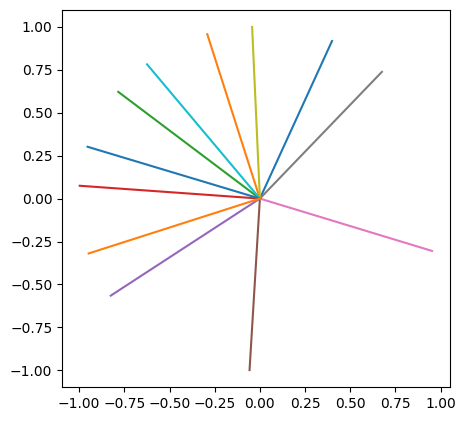

In [18]:
#plotting spokes wrt sun-aries axis 
    
plt.figure(figsize=(5,5), dpi=100)
for i in range(0,12):
    xpos = math.cos(math.radians(oppositions[i][1]))
    ypos = math.sin(math.radians(oppositions[i][1]))
        
    x = [0,xpos]
    y = [0,ypos]
        
        
    plt.plot(x,y)
    
plt.show()

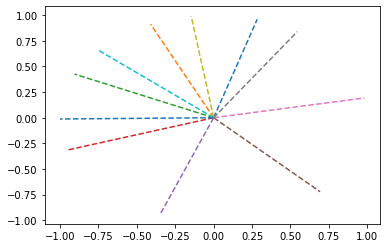

In [91]:
c = 60                # angle of centre from sun-aries axis----Assumed
for i in range(1,12):
    s = 360/687                                       #angular speed of mars
    t = ((oppositions[i][0] * s ) + t) % 360  # not fixed 687 , can change in neighborhood
    xposAtTimeT = math.cos(t * (math.pi / 180))
    yposAtTimeT = math.sin(t * (math.pi / 180))
    
    x = [0,xposAtTimeT]
    y = [0,yposAtTimeT]
    
    plt.plot(x, y, linestyle ='dashed')
    
plt.show()

In [109]:
# def getIntersectionPoint(h,k,theta, r,c):
#         """
#         Return intersection point of 0-centered circle and line from equant\n",
        
#         h     : x-coordinate of point through which line passes through
#         k     : y-coordinate of point through which line passes through
#         theta : angle the line makes with x-axis
#         r     : radius of the circle centered at the (1,c)
#                 where c is the angle centre makes with sun-aries line
#         """
    
#         b = 2 * ((h * math.cos(math.radians(theta))) + k * math.sin(math.radians(theta))
#                 -(math.cos(math.radians(c)) * math.cos(math.radians(theta)))
#                 -(math.sin(math.radians(c)) * math.sin(math.radians(theta))))
        
#         c1 = h**2 + k**2 + 1 - (2 * h *math.cos(math.radians(c))) - (2 * k * math.sin(math.radians(c))) - r**2
#         l1 = -b / 2
        
#         try:
#             l2 = math.sqrt(b ** 2 -(4 * c1)) / 2
#         except :
#             # print(" Value Error ",(b ** 2 -(4 * c1)) / 2)
#             l2 = 0
            
#         root1 = l1 + l2
#         root2 = l1 - l2
        
#         if root1 > 0:
#             ell = root1
#         else:
#             ell = root2
        
#         return (h + ell * math.cos(math.radians(theta))), (k + ell * math.sin(math.radians(theta)))




def getIntersectionPoint(h,k,theta, r,c):
        """
        Return intersection point of 0-centered circle and line from equant\n",
        
        h     : x-coordinate of point through which line passes through
        k     : y-coordinate of point through which line passes through
        theta : angle the line makes with x-axis
        r     : radius of the circle centered at the (1,c) 
        c     : the angle centre makes with sun-aries line
        ell_value : Running variable, different values pf l will give
                    different points on line which intersects with orbit.
        """
        # thetaInRadian = math.radians(theta)
        cosineValueOfTheta = math.cos(math.radians(theta))
        sineValueOfTheta = math.sin(math.radians(theta))

        # angleCInRadian = math.radians(c)
        cosineValueOfC = math.cos(math.radians(c))
        sineValueOfC = math.sin(math.radians(c))

        b = 2 * ((h * cosineValueOfTheta) + (k * sineValueOfTheta)
                -(cosineValueOfC * cosineValueOfTheta)
                -(sineValueOfC * sineValueOfTheta))
        
        c1 = h**2 + k**2 + 1 - (2 * h * cosineValueOfC) - (2 * k * sineValueOfC) - r**2
        l1 = -b / 2
        
        try:
            l2 = math.sqrt(b ** 2 -(4 * c1)) / 2
        except :
            l2 = 0
            
        root1 = l1 + l2
        root2 = l1 - l2
        
        if root1 > 0:
            ell_value = root1
        else:
            ell_value = root2
        
        return (h + ell_value * cosineValueOfTheta), (k + ell_value * sineValueOfTheta)


In [100]:
def MarsEquantModel(c,r,e1,e2,z,s,oppositions):
        """
        Return 12 errors of angle delta wrt to 12 oppositions and max error among these 12
        """
        errors = []
        xpos = list()
        ypos = list()
        
        h = e1 * math.cos(math.radians(e2 + z))
        k = e1 * math.sin(math.radians(e2 + z))
    
        thetaNew = z
        for i in range(12):
            theta = (s * times[i]) + thetaNew
            x,y = getIntersectionPoint(h,k,theta,r,c)
            xpos.append(x)
            ypos.append(y)
            angle = np.degrees(np.arctan2(y,x))%360
            print("projection of mars -in degree for spoke ",i,":-",angle,"\n")
            errors.append(abs(oppositions[i][1] - angle))
            thetaNew = theta
        maxError = max(errors)
        return errors, maxError

In [110]:
# errors, maxError = MarsEquantModel(162,7.599999999999991,1.4,93,56,0.524,oppositions)
errors, maxError = MarsEquantModel(149.0000001,8.59999999999999,1.60000000001,93.19999999,55.800000001,0.524093,oppositions)
print("12 spokes errors-:",errors)
print("---------------------------------------------------------")
print('maximum error:-',maxError)
# R value:- 7.599999999999991 C value:- 162  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3678
# S value:- 0.5229517722254489 C value:- 296  E1 value:- 1.9  E2 value:- 104  z value:- 9  Maximum Error:- 34.965
# S value:- 0.5227998838222465 C value:- 294  E1 value:- 1.9  E2 value:- 100  z value:- 9  Maximum Error:- 34.6343\n",

projection of mars -in degree for spoke  0 :- 66.41568548485075 

projection of mars -in degree for spoke  1 :- 106.91987148757997 

projection of mars -in degree for spoke  2 :- 141.61699958798587 

projection of mars -in degree for spoke  3 :- 175.71365621014655 

projection of mars -in degree for spoke  4 :- 214.40803212542343 

projection of mars -in degree for spoke  5 :- 266.6763801958711 

projection of mars -in degree for spoke  6 :- 342.28732724662217 

projection of mars -in degree for spoke  7 :- 47.5911838652876 

projection of mars -in degree for spoke  8 :- 92.51508723879607 

projection of mars -in degree for spoke  9 :- 128.68197103916125 

projection of mars -in degree for spoke  10 :- 162.47209374138987 

projection of mars -in degree for spoke  11 :- 198.67794720835812 

12 spokes errors-: [0.060703404038136455, 0.005128512420043307, 0.014221810208113084, 0.0030104565201156674, 0.02469879209010628, 0.040286470795535934, 0.020660579955517733, 0.06340608750981858, 0.04

In [95]:
def bestOrbitInnerParams(r,s,oppositions):          
        maxError = 1e20
        for c in tqdm(np.arange(149,149.5,0.01)):
            for e2 in np.arange(93,94,0.1):
                for z in np.arange(55,56,0.1):
                    for e1 in np.arange(1.4, 1.6,0.01):
                        errors, max_Error = MarsEquantModel(c,r,e1,e2,z,s,oppositions)
                        if(maxError > max_Error):
                            maxError = round(max_Error,4)
                            max_c = c
                            max_e1 = round(e1,4)
                            max_e2 = e2
                            max_z = z
                            ErrorList = errors
                            print("C value:-",max_c," E1 value:-",max_e1," E2 value:-",max_e2," z value:-",max_z," Maximum Error:-",maxError)
        return max_c,max_e1,max_e2,max_z,ErrorList,maxError

In [69]:
c,e1,e2,z,errors,maxError = bestOrbitInnerParams(9,0.524,oppositions)
print("------------------------------------------------------------------------------")
print("C value:-",c," E1 value:-",e1," E2 value:-",e2," z value:-",z," Error List:-",errors," Maximum Error:-",maxError)

C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 23.4413
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 22.8318
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 22.2234
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 40  Maximum Error:- 21.6159
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 40  Maximum Error:- 21.0093
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 40  Maximum Error:- 20.4035
C value:- 120  E1 value:- 1.1  E2 value:- 90  z value:- 40  Maximum Error:- 19.7984
C value:- 120  E1 value:- 1.2  E2 value:- 90  z value:- 40  Maximum Error:- 19.194
C value:- 120  E1 value:- 1.3  E2 value:- 90  z value:- 40  Maximum Error:- 18.6514
C value:- 120  E1 value:- 1.4  E2 value:- 90  z value:- 40  Maximum Error:- 18.1241
C value:- 120  E1 value:- 1.5  E2 value:- 90  z value:- 40  Maximum Error:- 17.5969
C value:- 120  E1 value:- 1.6  E2 value:- 90  z value:- 40  Maximum Error:- 1

C value:- 160  E1 value:- 1.7  E2 value:- 94  z value:- 56  Error List:- [0.5182677613559008, 0.4810821782993173, 0.2668597178863479, 0.0720217030286392, 0.008572715391579777, 0.26040476223653286, 0.44249984394002695, 0.015493020770101396, 0.11373086339274607, 0.058426605546117116, 0.2950759394015847, 0.4052584239866519]  Maximum Error:- 0.5183

C value:- 156  E1 value:- 1.7  E2 value:- 94  z value:- 56  Error List:- [0.4335879959283204, 0.43411727748262763, 0.26327225305570323, 0.06012622586749217, 0.05525068904415775, 0.3279752378614944, 0.44356738151401487, 0.060481490284736594, 0.04603284418153919, 0.07477753699399159, 0.2964579003206893, 0.44714505681105265]  Maximum Error:- 0.4471

In [67]:
def bestS(r, oppositions):
        leastError = 1e20
        for s in np.arange(680, 689,0.2):
            max_c,max_e1,max_e2,max_z,errors,maxError= bestOrbitInnerParams(r,360/s,oppositions)
            if(leastError > maxError):
                bestS = 360/s
                ErrorList = errors
                leastError = round(maxError,4)
                print("S value:-",bestS,"C value:-",max_c," E1 value:-",max_e1," E2 value:-",max_e2," z value:-",max_z," Maximum Error:-",maxError)
    #             print(\"S value:-\",bestS,\" Error List:-\",errors,\" Maximum Error:-\",maxError)\n",
        return bestS,ErrorList,leastError

In [ ]:
s,errors,maxError = bestS(7,oppositions)
print("------------------------------------------------------------------------------")
print("S value:-",s," Error List:-",errors," Maximum Error:-",maxError)

In [33]:
def bestR(s, oppositions):
        leastError = 1e20
        for r in np.arange(5, 10,0.1):
            max_c,max_e1,max_e2,max_z,errors,maxError= bestOrbitInnerParams(r,s,oppositions)
            if(leastError > maxError):
                bestR = r
                ErrorList = errors
                leastError = round(maxError,4)
                print("R value:-",bestR,"C value:-",max_c," E1 value:-",max_e1," E2 value:-",max_e2," z value:-",max_z," Maximum Error:-",maxError),
        return bestR,ErrorList,leastError

In [70]:
r,errors,maxError = bestR(0.524,oppositions)
print("------------------------------------------------------------------------------")
print("Best R val:- ",r," Error List:- ",errors," max Error:- ",maxError)

C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 20.9793
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 20.0775
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 19.1784
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 40  Maximum Error:- 18.2817
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 40  Maximum Error:- 17.3869
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 41  Maximum Error:- 17.2996
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 41  Maximum Error:- 16.4068
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 42  Maximum Error:- 16.3172
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 42  Maximum Error:- 15.4262
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 43  Maximum Error:- 15.3345
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 43  Maximum Error:- 14.4452
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 44  Maximum Error:- 

C value:- 120  E1 value:- 0.9  E2 value:- 92  z value:- 57  Maximum Error:- 1.0732
C value:- 120  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0586
C value:- 121  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0567
C value:- 122  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0549
C value:- 123  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0532
C value:- 124  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0516
C value:- 125  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.05
C value:- 126  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0486
C value:- 127  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0472
C value:- 128  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0459
C value:- 129  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0447
C value:- 130  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 1.0435
C valu

C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 21.2359
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 20.3543
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 19.4997
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 40  Maximum Error:- 18.6471
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 40  Maximum Error:- 17.7963
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 40  Maximum Error:- 16.9847
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 41  Maximum Error:- 16.8142
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 41  Maximum Error:- 15.9862
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 42  Maximum Error:- 15.8318
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 42  Maximum Error:- 14.9876
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 43  Maximum Error:- 14.849
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 43  Maximum Error:- 1

C value:- 120  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 0.989
C value:- 121  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 0.9873
C value:- 122  E1 value:- 1.0  E2 value:- 93  z value:- 57  Maximum Error:- 0.9856
C value:- 133  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.9776
C value:- 134  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.9541
C value:- 135  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.9302
C value:- 136  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.9061
C value:- 137  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.8817
C value:- 138  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.857
C value:- 139  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.8321
C value:- 140  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.8068
C value:- 141  E1 value:- 1.0  E2 value:- 93  z value:- 56  Maximum Error:- 0.7814
C valu

C value:- 120  E1 value:- 1.0  E2 value:- 92  z value:- 57  Maximum Error:- 0.9806
C value:- 139  E1 value:- 1.0  E2 value:- 95  z value:- 56  Maximum Error:- 0.9724
C value:- 139  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.9638
C value:- 140  E1 value:- 1.0  E2 value:- 95  z value:- 56  Maximum Error:- 0.9526
C value:- 140  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.9342
C value:- 141  E1 value:- 1.0  E2 value:- 95  z value:- 56  Maximum Error:- 0.9325
C value:- 141  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.9045
C value:- 142  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.8748
C value:- 143  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.845
C value:- 144  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.8385
C value:- 145  E1 value:- 1.0  E2 value:- 96  z value:- 56  Maximum Error:- 0.837
C value:- 146  E1 value:- 1.0  E2 value:- 95  z value:- 56  Maximum Error:- 0.8267
C valu

C value:- 129  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 1.0113
C value:- 130  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.9864
C value:- 131  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.9618
C value:- 132  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.9374
C value:- 133  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.9132
C value:- 134  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.8894
C value:- 135  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.8657
C value:- 136  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.8424
C value:- 137  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.8193
C value:- 138  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.7965
C value:- 139  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.774
C value:- 140  E1 value:- 1.1  E2 value:- 91  z value:- 56  Maximum Error:- 0.7631
C val

C value:- 151  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4867
C value:- 152  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4806
C value:- 153  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4759
C value:- 154  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.471
C value:- 155  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4659
C value:- 156  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4606
C value:- 157  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4551
C value:- 157  E1 value:- 1.1  E2 value:- 94  z value:- 56  Maximum Error:- 0.4509
C value:- 158  E1 value:- 1.1  E2 value:- 93  z value:- 56  Maximum Error:- 0.4495
C value:- 158  E1 value:- 1.1  E2 value:- 94  z value:- 56  Maximum Error:- 0.4375
R value:- 5.899999999999997 C value:- 158  E1 value:- 1.1  E2 value:- 94  z value:- 56  Maximum Error:- 0.4375
C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  

C value:- 120  E1 value:- 1.1  E2 value:- 92  z value:- 57  Maximum Error:- 0.9029
C value:- 137  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.8819
C value:- 138  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.8544
C value:- 139  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.8269
C value:- 140  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.8046
C value:- 141  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.7858
C value:- 142  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.7667
C value:- 143  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.7473
C value:- 144  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.7276
C value:- 145  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.7076
C value:- 146  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.6873
C value:- 147  E1 value:- 1.1  E2 value:- 95  z value:- 56  Maximum Error:- 0.6666
C va

C value:- 128  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 1.0055
C value:- 129  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.9825
C value:- 130  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.9596
C value:- 131  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.937
C value:- 132  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.9156
C value:- 133  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.8958
C value:- 134  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.8758
C value:- 135  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.8556
C value:- 136  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.8351
C value:- 137  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.8143
C value:- 138  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.7933
C value:- 139  E1 value:- 1.2  E2 value:- 92  z value:- 56  Maximum Error:- 0.772
C valu

C value:- 153  E1 value:- 1.2  E2 value:- 93  z value:- 56  Maximum Error:- 0.418
C value:- 154  E1 value:- 1.2  E2 value:- 93  z value:- 56  Maximum Error:- 0.4095
C value:- 155  E1 value:- 1.2  E2 value:- 93  z value:- 56  Maximum Error:- 0.4048
R value:- 6.399999999999995 C value:- 155  E1 value:- 1.2  E2 value:- 93  z value:- 56  Maximum Error:- 0.4048
C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 22.2306
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 21.385
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 20.5422
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 40  Maximum Error:- 19.8037
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 40  Maximum Error:- 19.0929
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 40  Maximum Error:- 18.3829
C value:- 120  E1 value:- 1.1  E2 value:- 90  z value:- 40  Maximum Error:- 17.6737
C value:- 120  E1 value:- 1.2  E2 value:- 90  z value:

C value:- 132  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.8785
C value:- 133  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.8531
C value:- 134  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.8375
C value:- 135  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.8218
C value:- 136  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.8059
C value:- 137  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.7896
C value:- 138  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.7731
C value:- 139  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.7562
C value:- 140  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.7391
C value:- 141  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.7216
C value:- 141  E1 value:- 1.2  E2 value:- 95  z value:- 56  Maximum Error:- 0.7211
C value:- 142  E1 value:- 1.2  E2 value:- 94  z value:- 56  Maximum Error:- 0.7038
C va

C value:- 132  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.9744
C value:- 133  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.9537
C value:- 134  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.9332
C value:- 135  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.913
C value:- 136  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.8929
C value:- 137  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.8731
C value:- 138  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.8536
C value:- 139  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.8342
C value:- 140  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.8151
C value:- 141  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.7963
C value:- 142  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.7777
C value:- 143  E1 value:- 1.3  E2 value:- 92  z value:- 56  Maximum Error:- 0.7593
C val

C value:- 153  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.4038
C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 22.5437
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 21.7588
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 20.9761
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 40  Maximum Error:- 20.1955
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 40  Maximum Error:- 19.5138
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 40  Maximum Error:- 18.8494
C value:- 120  E1 value:- 1.1  E2 value:- 90  z value:- 40  Maximum Error:- 18.1856
C value:- 120  E1 value:- 1.2  E2 value:- 90  z value:- 40  Maximum Error:- 17.5224
C value:- 120  E1 value:- 1.3  E2 value:- 90  z value:- 40  Maximum Error:- 16.9062
C value:- 120  E1 value:- 1.2  E2 value:- 90  z value:- 41  Maximum Error:- 16.5363
C value:- 120  E1 value:- 1.3  E2 value:- 90  z value:- 41  Maximum Error:- 1

C value:- 127  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8796
C value:- 128  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8672
C value:- 129  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8544
C value:- 130  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8413
C value:- 131  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8279
C value:- 132  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8142
C value:- 133  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.8001
C value:- 133  E1 value:- 1.3  E2 value:- 94  z value:- 56  Maximum Error:- 0.7946
C value:- 134  E1 value:- 1.3  E2 value:- 93  z value:- 56  Maximum Error:- 0.7858
C value:- 134  E1 value:- 1.3  E2 value:- 94  z value:- 56  Maximum Error:- 0.7709
C value:- 135  E1 value:- 1.3  E2 value:- 94  z value:- 56  Maximum Error:- 0.747
C value:- 136  E1 value:- 1.3  E2 value:- 94  z value:- 56  Maximum Error:- 0.7231
C val

C value:- 154  E1 value:- 1.3  E2 value:- 94  z value:- 56  Maximum Error:- 0.4937
C value:- 155  E1 value:- 1.3  E2 value:- 94  z value:- 56  Maximum Error:- 0.4743
C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 22.7105
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 21.958
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 21.2075
C value:- 120  E1 value:- 0.8  E2 value:- 90  z value:- 40  Maximum Error:- 20.4588
C value:- 120  E1 value:- 0.9  E2 value:- 90  z value:- 40  Maximum Error:- 19.741
C value:- 120  E1 value:- 1.0  E2 value:- 90  z value:- 40  Maximum Error:- 19.1013
C value:- 120  E1 value:- 1.1  E2 value:- 90  z value:- 40  Maximum Error:- 18.4622
C value:- 120  E1 value:- 1.2  E2 value:- 90  z value:- 40  Maximum Error:- 17.8235
C value:- 120  E1 value:- 1.3  E2 value:- 90  z value:- 40  Maximum Error:- 17.1851
C value:- 120  E1 value:- 1.4  E2 value:- 90  z value:- 40  Maximum Error:- 17.1

C value:- 120  E1 value:- 1.4  E2 value:- 92  z value:- 57  Maximum Error:- 0.9563
C value:- 125  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.9529
C value:- 126  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.933
C value:- 127  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.9132
C value:- 128  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8936
C value:- 129  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8742
C value:- 130  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.855
C value:- 131  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8359
C value:- 132  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8171
C value:- 133  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.7983
C value:- 134  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.7798
C value:- 135  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.7615
C valu

C value:- 141  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.5486
C value:- 142  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.5322
C value:- 143  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.516
C value:- 144  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.5
C value:- 145  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4842
C value:- 146  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4686
C value:- 147  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4533
C value:- 148  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4383
C value:- 149  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4234
C value:- 150  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4088
C value:- 151  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3945
C value:- 152  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3827
C value:

C value:- 154  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.404
C value:- 155  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.4
C value:- 156  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3958
C value:- 157  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3915
C value:- 158  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.387
C value:- 159  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3824
C value:- 160  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3777
C value:- 161  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3728
C value:- 162  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3678
R value:- 7.599999999999991 C value:- 162  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3678
C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 22.9122
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Max

C value:- 120  E1 value:- 1.4  E2 value:- 92  z value:- 57  Maximum Error:- 0.8489
C value:- 138  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8363
C value:- 139  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8221
C value:- 140  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.8077
C value:- 141  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.793
C value:- 142  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.778
C value:- 143  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.7629
C value:- 144  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.7475
C value:- 145  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.7318
C value:- 146  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.716
C value:- 146  E1 value:- 1.4  E2 value:- 94  z value:- 56  Maximum Error:- 0.7134
C value:- 147  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.6999
C value

C value:- 143  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.6864
C value:- 143  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6857
C value:- 144  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.6709
C value:- 144  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6678
C value:- 145  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.6556
C value:- 145  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6499
C value:- 146  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.6406
C value:- 146  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6317
C value:- 147  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.6258
C value:- 147  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6135
C value:- 148  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.6113
C value:- 148  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.5951
C va

C value:- 136  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6729
C value:- 137  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6568
C value:- 138  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6406
C value:- 139  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6241
C value:- 140  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.6074
C value:- 141  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.5906
C value:- 142  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.5736
C value:- 143  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.5564
C value:- 144  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.5391
C value:- 145  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.5216
C value:- 146  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.504
C value:- 147  E1 value:- 1.5  E2 value:- 94  z value:- 56  Maximum Error:- 0.4862
C val

C value:- 145  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.4574
C value:- 146  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.4431
C value:- 147  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.4289
C value:- 148  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.415
C value:- 149  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.4013
C value:- 150  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3878
C value:- 151  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3853
C value:- 152  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3843
C value:- 153  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3834
C value:- 154  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3825
C value:- 155  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3818
C value:- 156  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3812
C val

C value:- 154  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.4016
C value:- 155  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3979
C value:- 156  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3941
C value:- 157  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3901
C value:- 158  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3859
C value:- 159  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3817
C value:- 160  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3773
C value:- 161  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3728
C value:- 162  E1 value:- 1.5  E2 value:- 93  z value:- 56  Maximum Error:- 0.3681
C value:- 120  E1 value:- 0.5  E2 value:- 90  z value:- 40  Maximum Error:- 23.1774
C value:- 120  E1 value:- 0.6  E2 value:- 90  z value:- 40  Maximum Error:- 22.5162
C value:- 120  E1 value:- 0.7  E2 value:- 90  z value:- 40  Maximum Error:- 21.8562
C

C value:- 120  E1 value:- 1.5  E2 value:- 92  z value:- 57  Maximum Error:- 0.854
C value:- 131  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.8539
C value:- 132  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.8394
C value:- 133  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.8247
C value:- 134  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.8098
C value:- 135  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7947
C value:- 136  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7794
C value:- 137  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7638
C value:- 138  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7481
C value:- 139  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7323
C value:- 140  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7162
C value:- 141  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6999
C val

C value:- 130  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7523
C value:- 131  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7359
C value:- 132  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7196
C value:- 133  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7035
C value:- 134  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6875
C value:- 135  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6717
C value:- 136  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6561
C value:- 137  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6406
C value:- 138  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6253
C value:- 139  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6102
C value:- 140  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.5953
C value:- 141  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.5805
C va

C value:- 124  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.8309
C value:- 125  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.8118
C value:- 126  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7925
C value:- 127  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7732
C value:- 128  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7537
C value:- 129  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7342
C value:- 130  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.7145
C value:- 131  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6948
C value:- 132  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6751
C value:- 133  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6552
C value:- 134  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6353
C value:- 135  E1 value:- 1.6  E2 value:- 94  z value:- 56  Maximum Error:- 0.6153
C va

C value:- 129  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7655
C value:- 130  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7493
C value:- 131  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7332
C value:- 132  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7173
C value:- 133  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7016
C value:- 133  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6981
C value:- 134  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.686
C value:- 134  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6785
C value:- 135  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.6705
C value:- 135  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6588
C value:- 136  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.6553
C value:- 136  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6391
C val

C value:- 136  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.744
C value:- 137  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7317
C value:- 138  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7192
C value:- 138  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.7128
C value:- 139  E1 value:- 1.6  E2 value:- 92  z value:- 56  Maximum Error:- 0.7064
C value:- 139  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6934
C value:- 140  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.674
C value:- 141  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6546
C value:- 142  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6351
C value:- 143  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.6157
C value:- 144  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.5963
C value:- 145  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.5768
C valu

C value:- 154  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.5207
C value:- 155  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.502
C value:- 156  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.4851
C value:- 157  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.4691
C value:- 158  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.453
C value:- 159  E1 value:- 1.6  E2 value:- 93  z value:- 56  Maximum Error:- 0.4367
------------------------------------------------------------------------------
Best R val:-  7.599999999999991  Error List:-  [0.3484173619400792, 0.1286939982802835, 0.03844645270126534, 0.14682124454856194, 0.3327281744573156, 0.04132916756935856, 0.23718906455610522, 0.016789866778772478, 0.20398028412527935, 0.36780876098285376, 0.34787804722407145, 0.15609964900053797]  max Error:-  0.3678


R value:- 7.599999999999991 C value:- 162  E1 value:- 1.4  E2 value:- 93  z value:- 56  Maximum Error:- 0.3678<br>
Best R val:-  7.599999999999991  Error List:-  [0.3484173619400792, 0.1286939982802835, 0.03844645270126534, 0.14682124454856194, 0.3327281744573156, 0.04132916756935856, 0.23718906455610522, 0.016789866778772478, 0.20398028412527935, 0.36780876098285376, 0.34787804722407145, 0.15609964900053797]  max Error:-  0.3678

In [94]:
def bestMarsOrbitParams(oppositions):
    bestError = 1e24
    for r in tqdm(np.arange(8,9,0.1)):
        for s in np.arange(686,687,0.1):
            max_c,max_e1,max_e2,max_z,errors,maxError= bestOrbitInnerParams(r,360/s,oppositions)
            if(bestError > maxError):
                optimumCVal = max_c
                optimume1Val = max_e1
                optimume2Val = max_e2
                optimumZVal = max_z
                bestErrorList= errors
                bestError = maxError
                optimumRVal = r
                optimumSVal = 360/s
                print("Best Error:- ",bestError,"optimumCVal:- ",optimumCVal,"optimume1Val:- ",optimume1Val,"optimume2Val:- ",optimume2Val,"optimumZVal",optimumZVal,"optimumRVal:- ",optimumRVal,"optimumSVal",optimumSVal)
    return optimumRVal,optimumSVal,optimumCVal,optimume1Val,optimume2Val,optimumZVal,bestErrorList,bestError

In [53]:
r,s,c,e1,e2,z,errors,maxError = bestMarsOrbitParams(oppositions)
print("====================================================================================================")
print("Best Error:- ",maxError,"optimumCVal:- ",c,"optimume1Val:- ",e1,"optimume2Val:- ",e2,"optimumZVal",z,"optimumRVal:- ",r,"optimumSVal",s)

Best Error:-  137.3127 optimumCVal:-  278 optimume1Val:-  1.9 optimume2Val:-  105 optimumZVal 62 optimumRVal:-  3.0 optimumSVal 0.5
Best Error:-  137.2632 optimumCVal:-  290 optimume1Val:-  1.8 optimume2Val:-  101 optimumZVal 62 optimumRVal:-  3.2 optimumSVal 0.5


KeyboardInterrupt: 

In [216]:
def plotMarsOrbit(c,r,e1,e2,z,oppositions):
    """
        plot mars orbit given centre of circle and radius along with spokes from equant and sun.
    """
    
    figure, axes = plt.subplots(1,1,figsize=(10,10))
    #change default range 
#     axes.figsize(5,5)
    axes.set_xlim((-10, 10))
    axes.set_ylim((-10, 10))
    
    
    
    CentreXPos = math.cos(math.radians(c))
    CentreYPos = math.sin(math.radians(c))
    h = e1 * math.cos(math.radians(e2+z))
    k = e1 * math.sin(math.radians(e2+z))
    xpos=[]
    ypos=[]
    
    thetaNew = z
    for i in range(12):
        theta = (s * oppositions[i][0]) + thetaNew
        x,y = getIntersectionPoint(h,k,theta,r,c)
        plt.scatter(x,y,c = 'k')
        plt.plot([h,x],[k,y],linestyle = 'dashed')
        xpos.append(x)
        ypos.append(y)
        thetaNew = theta
        
    orbit = plt.Circle((CentreXPos, CentreYPos), r, color='blue', fill = False)

    
    for i in range(0,12):
        xpos = math.cos(math.radians(oppositions[i][1]))
        ypos = math.sin(math.radians(oppositions[i][1]))
        
        x = [0,xpos*20]
        y = [0,ypos*20]


        plt.plot(x,y)
    

    
    axes.annotate('centre', xy =(CentreXPos, CentreYPos), fontsize = 14)
    axes.annotate('sun', xy =(0, 0),fontsize = 14)
    axes.annotate('equant', xy =(h, k),fontsize = 14)
    
    axes.scatter([0,CentreXPos,h],[0,CentreYPos,k])
    
    
    axes.add_artist(orbit)
    plt.title( 'Mars Predicted Orbit' )
    plt.show()

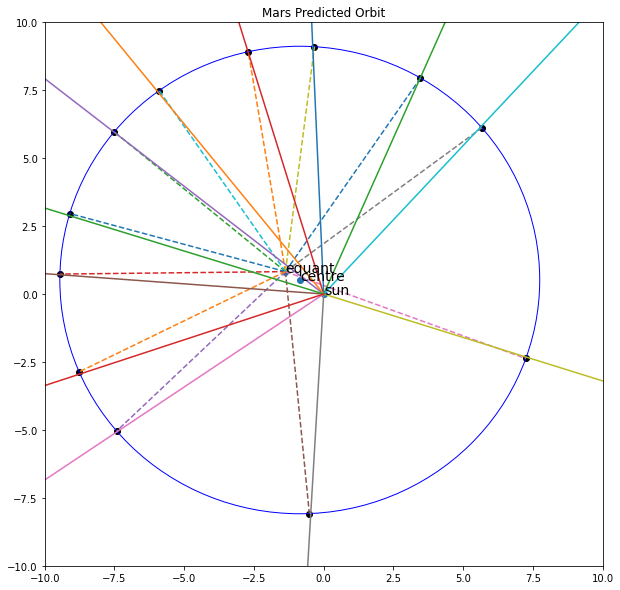

In [217]:
plotMarsOrbit(149,8.599999,1.6,93.199999999,55.800000001,oppositions)

In [165]:
errors, maxError = MarsEquantModel(149.0000001,8.59999999999999,1.60000000001,93.19999999,55.800000001,0.524093,oppositions)

projection of mars -in degree for spoke  0 :- 66.41568548485075 

projection of mars -in degree for spoke  1 :- 106.91987148757997 

projection of mars -in degree for spoke  2 :- 141.61699958798587 

projection of mars -in degree for spoke  3 :- 175.71365621014655 

projection of mars -in degree for spoke  4 :- 214.40803212542343 

projection of mars -in degree for spoke  5 :- 266.6763801958711 

projection of mars -in degree for spoke  6 :- 342.28732724662217 

projection of mars -in degree for spoke  7 :- 47.5911838652876 

projection of mars -in degree for spoke  8 :- 92.51508723879607 

projection of mars -in degree for spoke  9 :- 128.68197103916125 

projection of mars -in degree for spoke  10 :- 162.47209374138987 

projection of mars -in degree for spoke  11 :- 198.67794720835812 



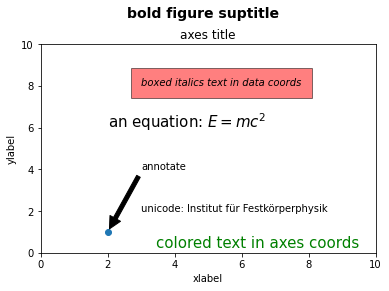

In [211]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()